In [1]:
import numpy as np
import random
from grid_world import GridWorld
from draw import draw
from tqdm import tqdm
from experience_replay_buffer import ExperienceReplayBuffer

rows = 5
cols = 5
env = GridWorld(
    forbidden_score=-10,
    terminal_score=1,
    desc=[".....", ".##..", "..#..", ".#T#.", ".#..."],
)
env.render_grid()


‚¨úÔ∏è‚¨úÔ∏è‚¨úÔ∏è‚¨úÔ∏è‚¨úÔ∏è
‚¨úÔ∏èüö´üö´‚¨úÔ∏è‚¨úÔ∏è
‚¨úÔ∏è‚¨úÔ∏èüö´‚¨úÔ∏è‚¨úÔ∏è
‚¨úÔ∏èüö´‚úÖüö´‚¨úÔ∏è
‚¨úÔ∏èüö´‚¨úÔ∏è‚¨úÔ∏è‚¨úÔ∏è


  0%|          | 0/1000 [00:00<?, ?it/s]

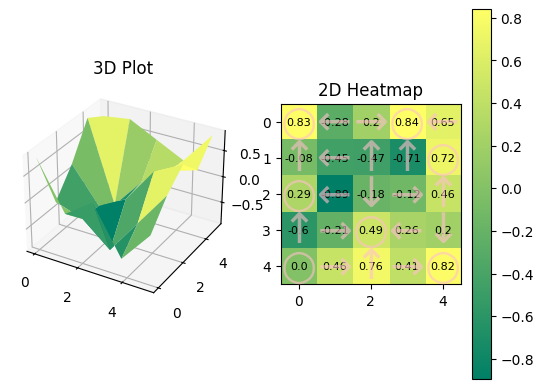

  0%|          | 1/1000 [00:00<03:03,  5.46it/s]

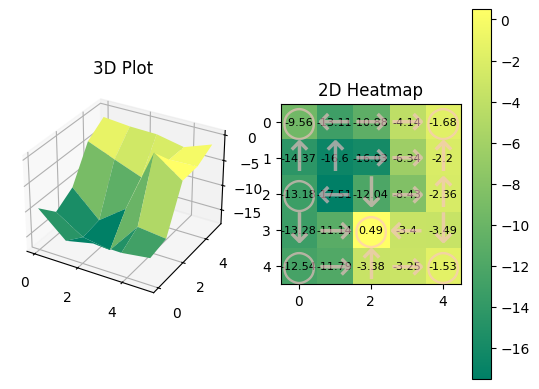

  2%|‚ñè         | 21/1000 [00:00<00:14, 67.35it/s]

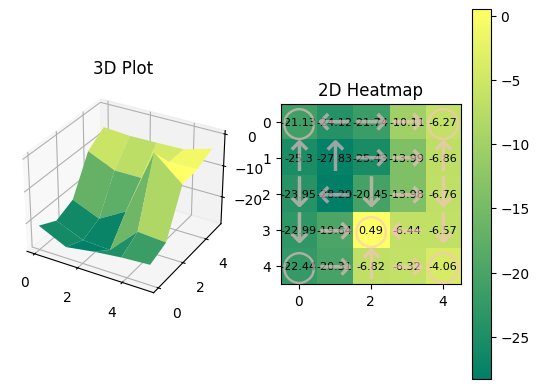

  4%|‚ñç         | 41/1000 [00:00<00:12, 78.84it/s]

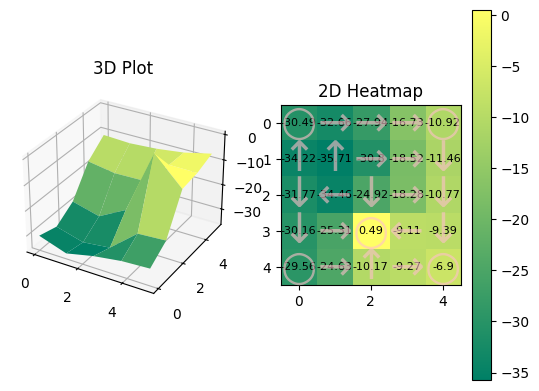

  6%|‚ñå         | 61/1000 [00:00<00:10, 93.85it/s]

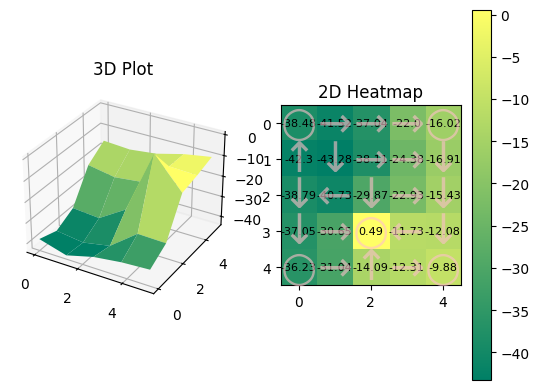

  8%|‚ñä         | 81/1000 [00:00<00:08, 102.60it/s]

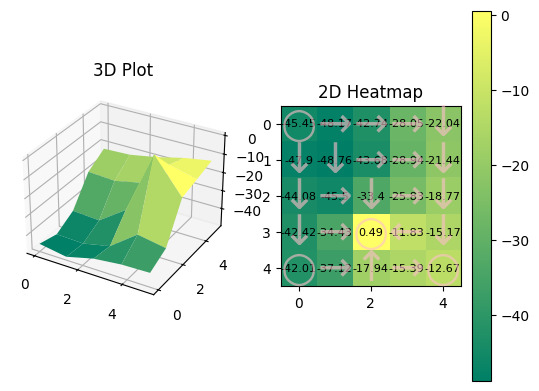

 10%|‚ñà         | 101/1000 [00:01<00:08, 110.07it/s]

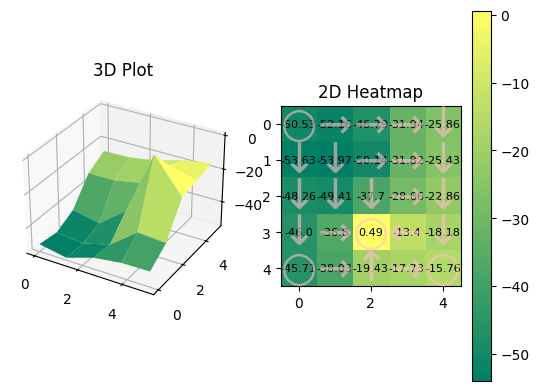

 12%|‚ñà‚ñè        | 121/1000 [00:01<00:07, 115.32it/s]

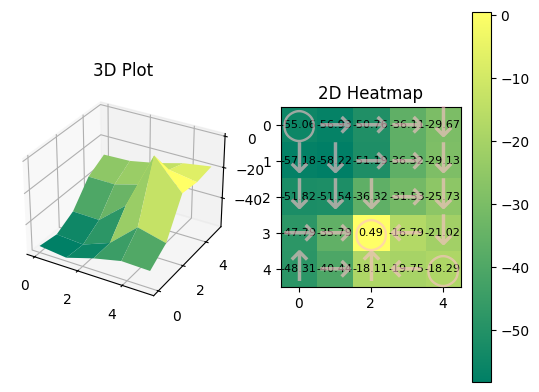

 14%|‚ñà‚ñç        | 141/1000 [00:01<00:07, 117.28it/s]

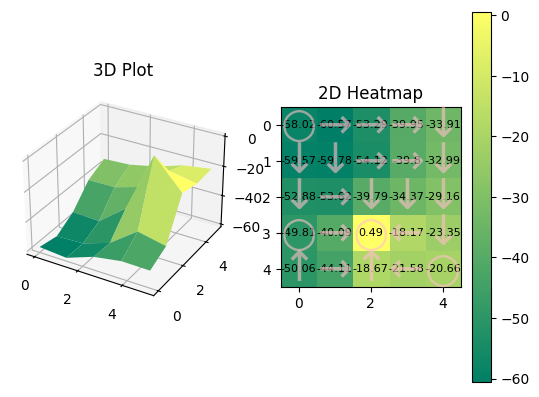

 16%|‚ñà‚ñå        | 161/1000 [00:01<00:07, 118.46it/s]

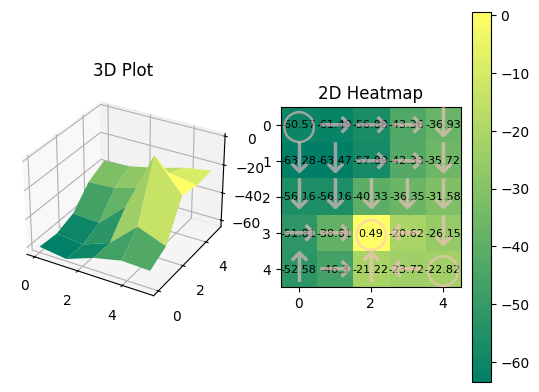

 18%|‚ñà‚ñä        | 181/1000 [00:01<00:06, 120.46it/s]

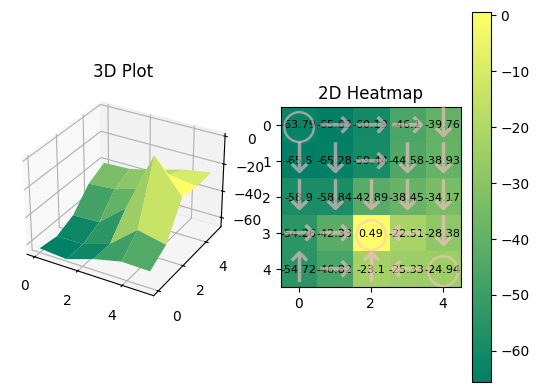

 20%|‚ñà‚ñà        | 201/1000 [00:01<00:06, 124.93it/s]

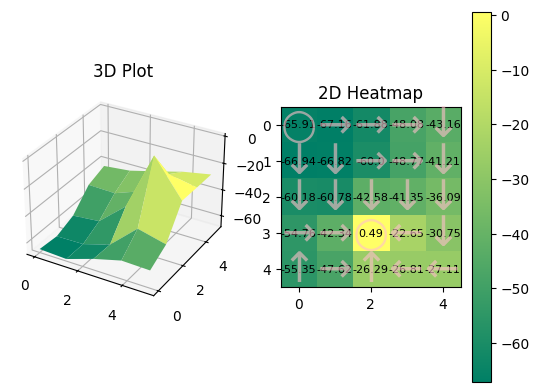

 22%|‚ñà‚ñà‚ñè       | 221/1000 [00:02<00:06, 126.11it/s]

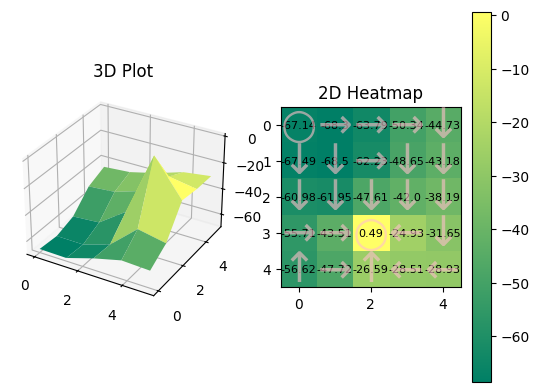

 24%|‚ñà‚ñà‚ñç       | 241/1000 [00:02<00:06, 118.45it/s]

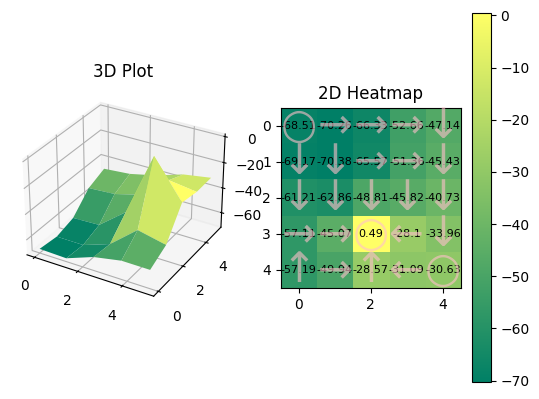

 26%|‚ñà‚ñà‚ñå       | 261/1000 [00:02<00:05, 123.74it/s]

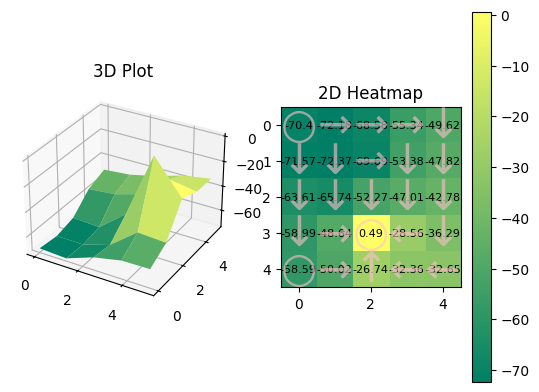

 28%|‚ñà‚ñà‚ñä       | 281/1000 [00:02<00:05, 124.14it/s]

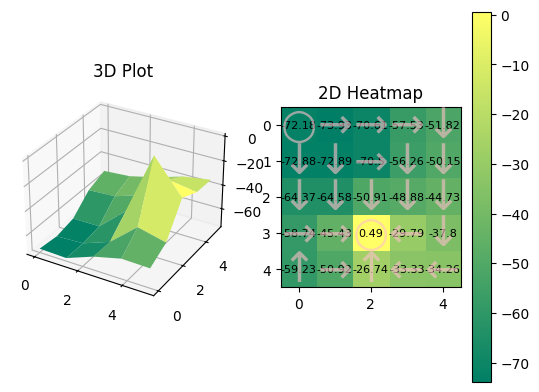

 30%|‚ñà‚ñà‚ñà       | 301/1000 [00:02<00:05, 122.85it/s]

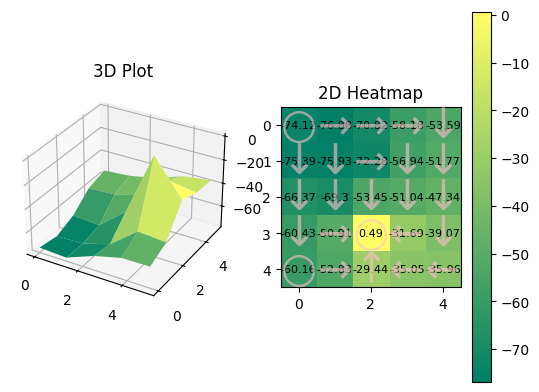

 32%|‚ñà‚ñà‚ñà‚ñè      | 321/1000 [00:02<00:05, 121.52it/s]

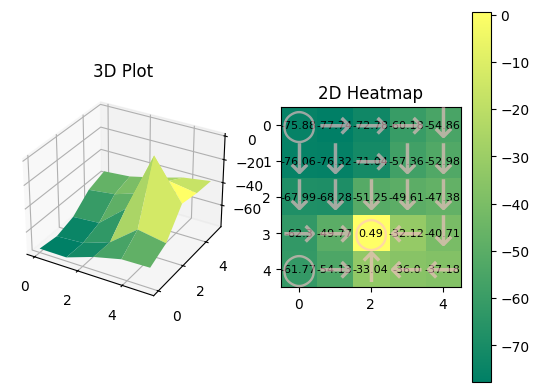

 34%|‚ñà‚ñà‚ñà‚ñç      | 341/1000 [00:03<00:05, 123.51it/s]

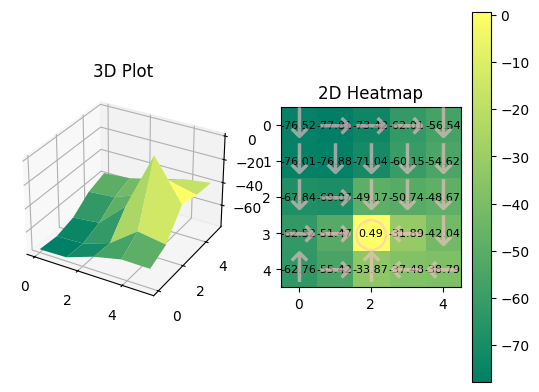

 36%|‚ñà‚ñà‚ñà‚ñå      | 361/1000 [00:03<00:06, 106.42it/s]

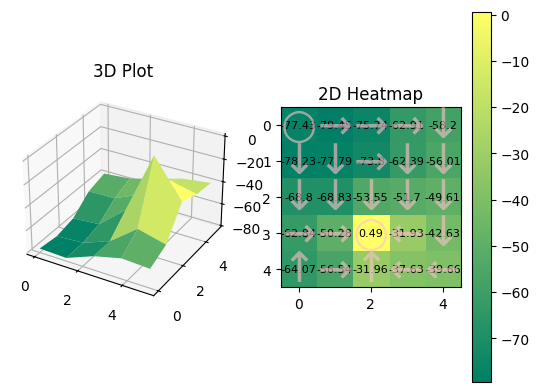

 38%|‚ñà‚ñà‚ñà‚ñä      | 381/1000 [00:03<00:05, 105.99it/s]

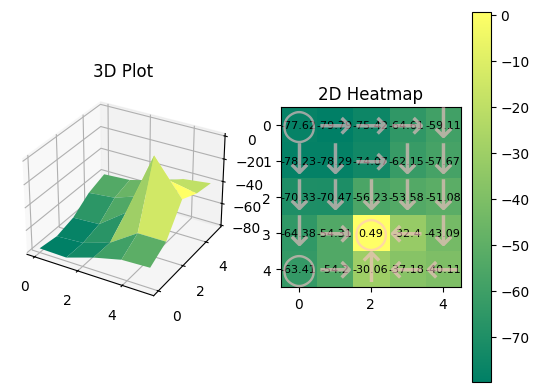

 40%|‚ñà‚ñà‚ñà‚ñà      | 401/1000 [00:03<00:05, 111.22it/s]

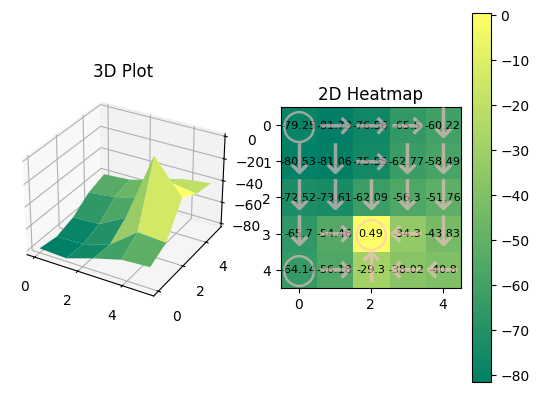

 42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 421/1000 [00:03<00:05, 114.92it/s]

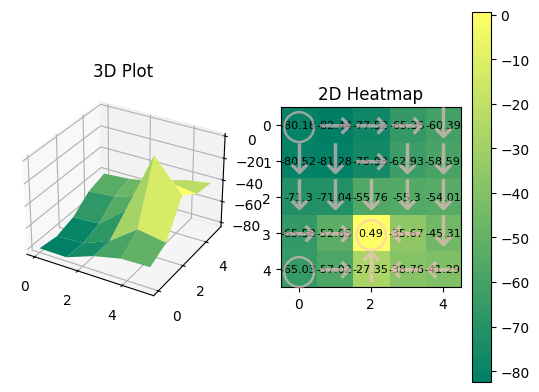

 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 441/1000 [00:03<00:04, 118.63it/s]

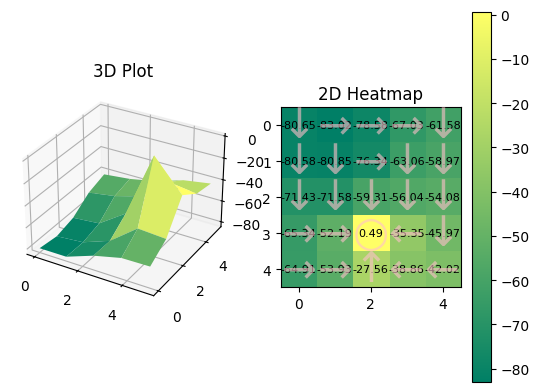

 46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 461/1000 [00:04<00:04, 119.34it/s]

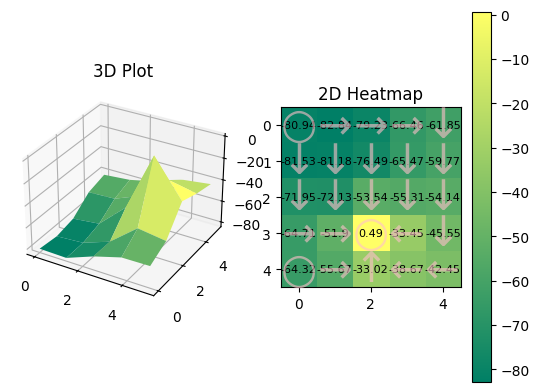

 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 481/1000 [00:04<00:04, 122.91it/s]

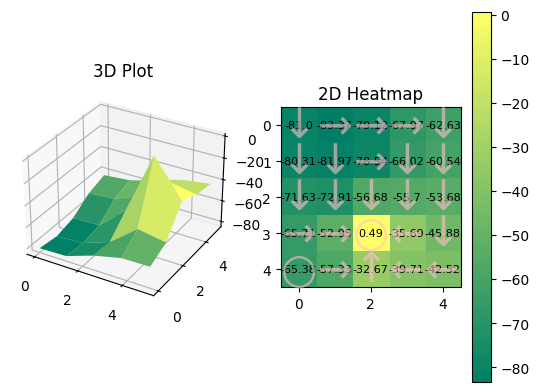

 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 501/1000 [00:04<00:04, 114.87it/s]

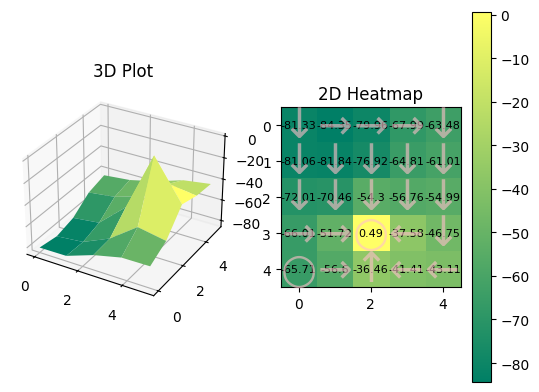

 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 521/1000 [00:04<00:04, 118.49it/s]

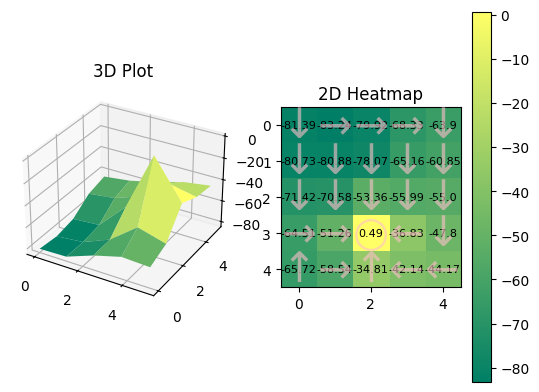

 54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 541/1000 [00:04<00:03, 122.25it/s]

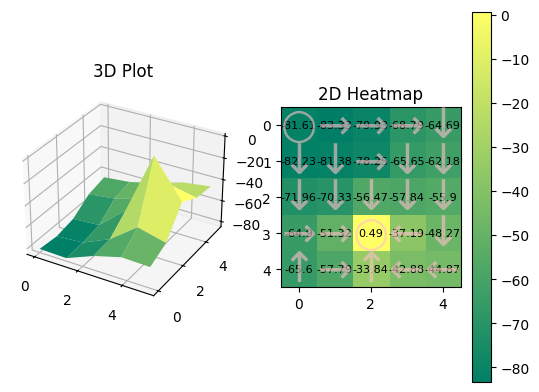

 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 561/1000 [00:04<00:03, 124.26it/s]

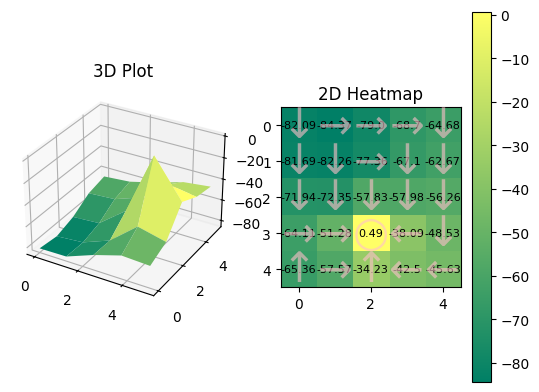

 58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 581/1000 [00:05<00:03, 126.04it/s]

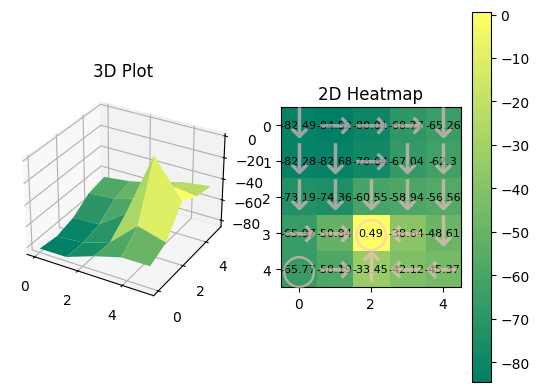

 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 601/1000 [00:05<00:03, 127.02it/s]

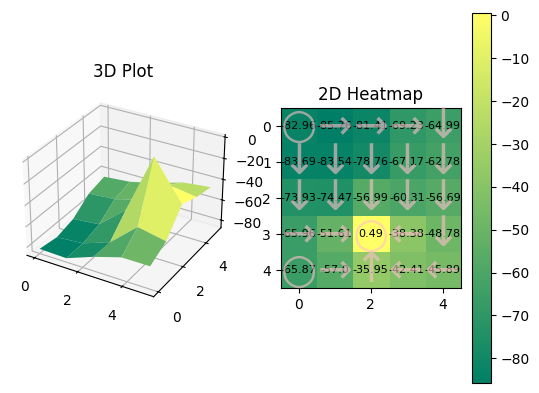

 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 621/1000 [00:05<00:02, 128.79it/s]

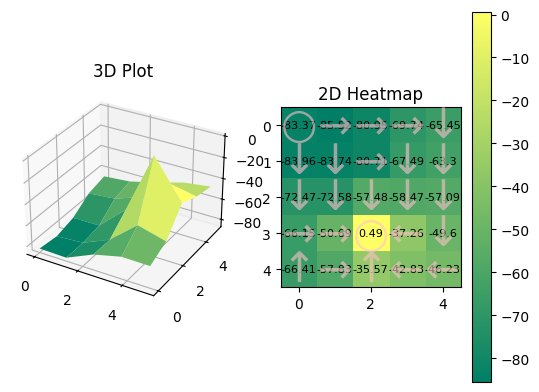

 64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 641/1000 [00:05<00:02, 128.62it/s]

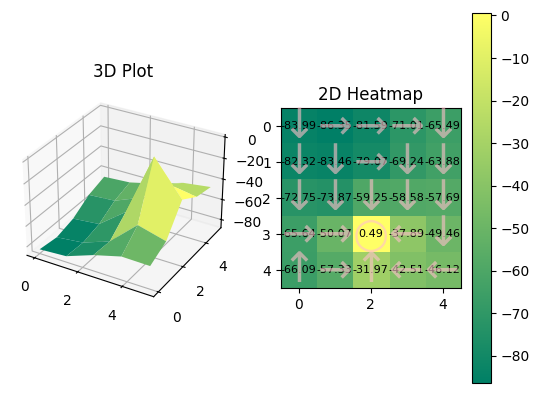

 66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 661/1000 [00:05<00:02, 127.97it/s]

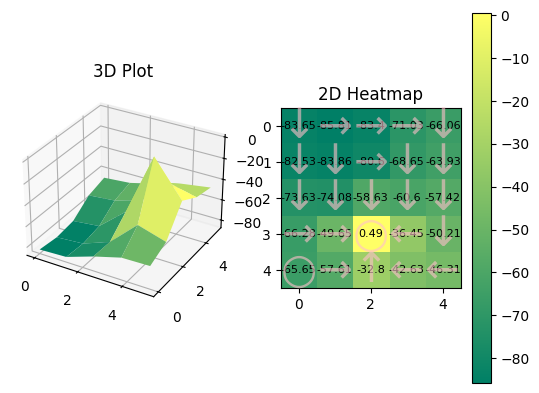

 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 681/1000 [00:05<00:02, 130.13it/s]

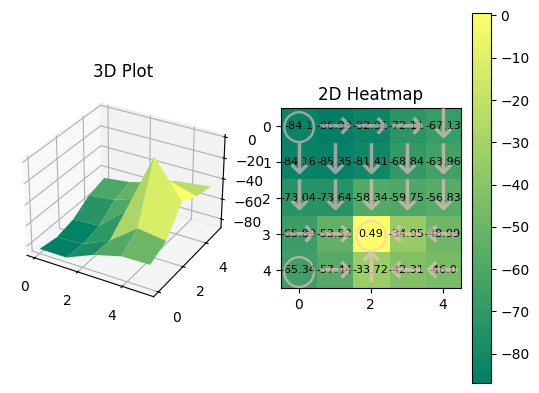

 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 701/1000 [00:05<00:02, 128.97it/s]

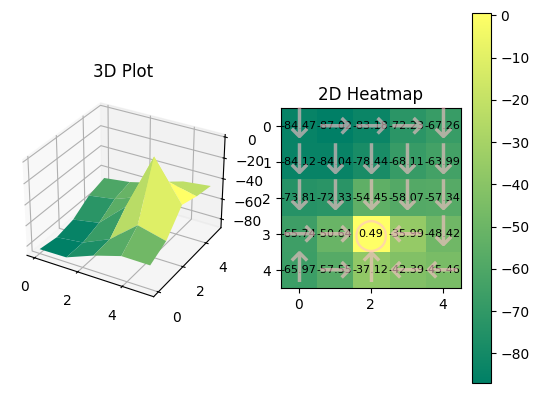

 72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 721/1000 [00:06<00:02, 129.56it/s]

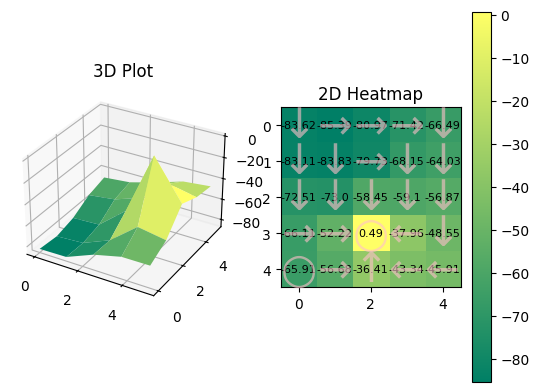

 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 741/1000 [00:06<00:02, 105.77it/s]

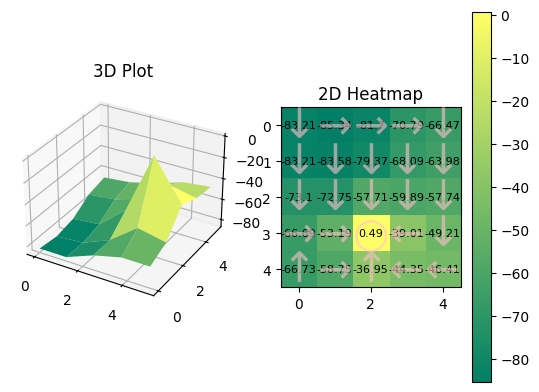

 76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 761/1000 [00:06<00:02, 111.73it/s]

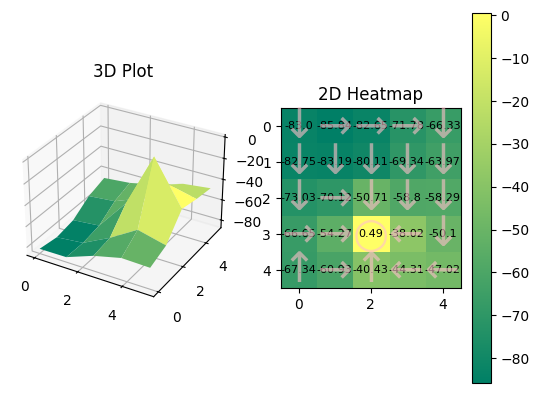

 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 781/1000 [00:06<00:01, 115.50it/s]

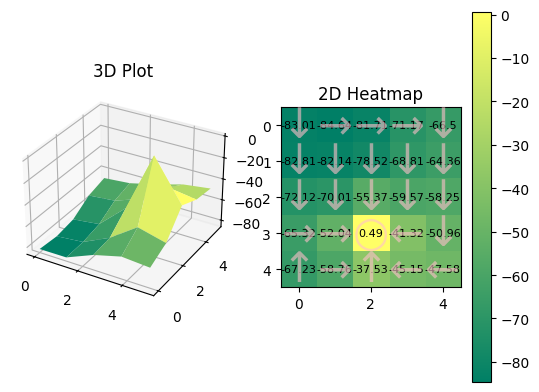

 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 801/1000 [00:06<00:01, 118.73it/s]

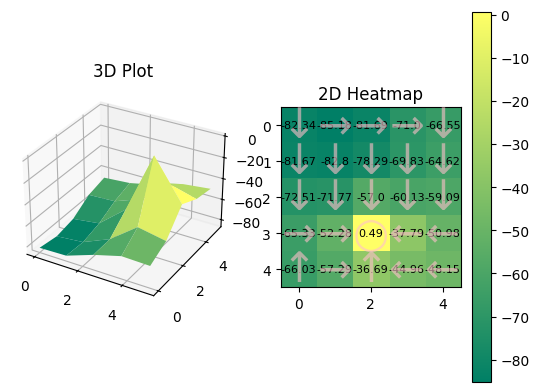

 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 821/1000 [00:07<00:01, 122.80it/s]

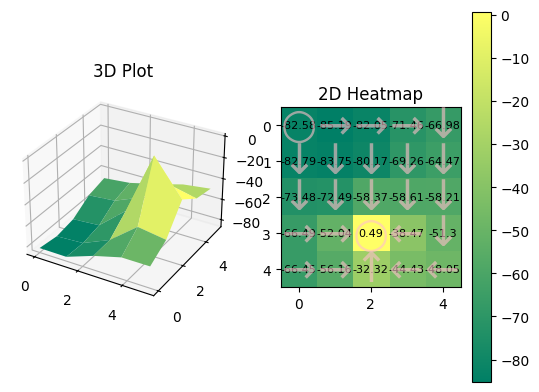

 84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 841/1000 [00:07<00:01, 123.18it/s]

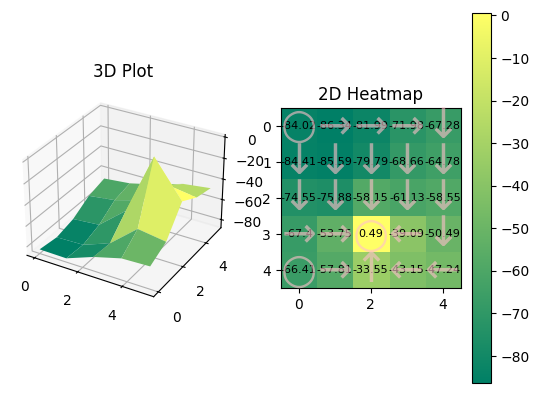

 86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 861/1000 [00:07<00:01, 117.19it/s]

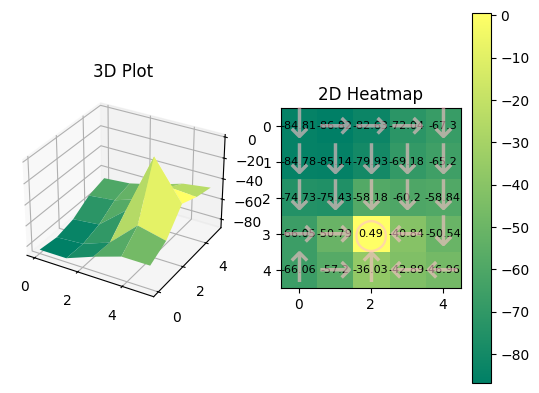

 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 881/1000 [00:07<00:00, 120.64it/s]

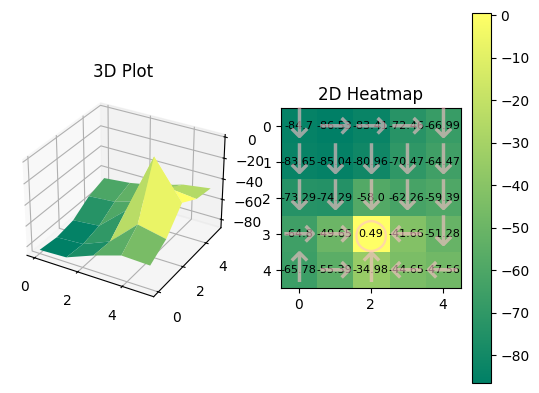

 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 901/1000 [00:07<00:00, 123.83it/s]

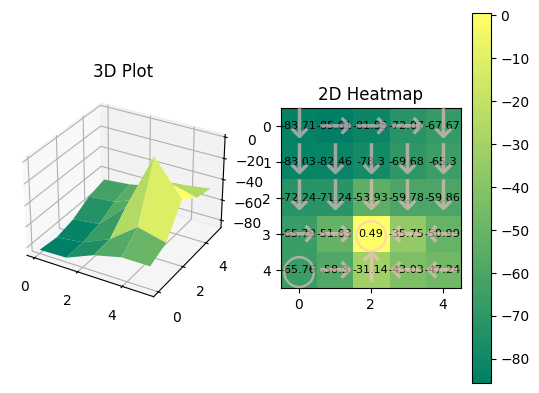

 92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 921/1000 [00:07<00:00, 125.95it/s]

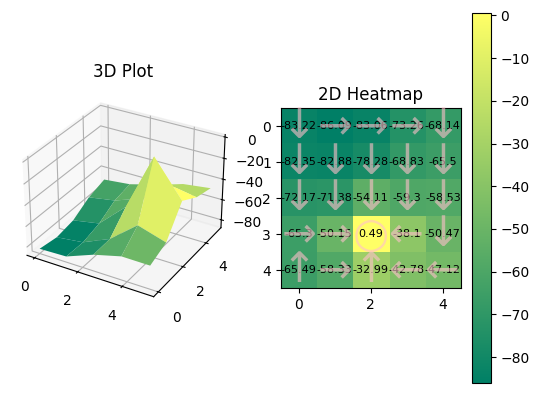

 94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 941/1000 [00:08<00:00, 125.15it/s]

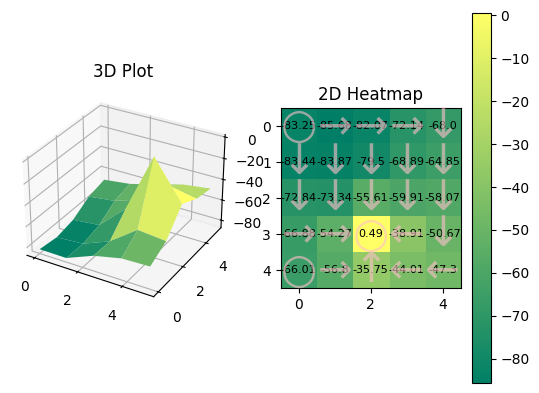

 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 961/1000 [00:08<00:00, 125.89it/s]

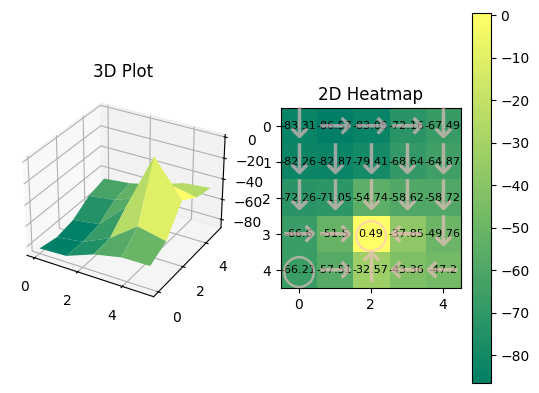

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1000/1000 [00:08<00:00, 119.96it/s]


In [3]:
policy = 0.2 * np.ones((rows * cols, 5))
episodes = [
    env.get_traj(10, action=random.randint(0, 4), policy=policy) for i in range(500)
]
experience_pool = ExperienceReplayBuffer(max_size=10000)
for traj in episodes:
    for exp in traj:
        experience_pool.add_experience(exp)

state_values = np.array([random.random() for i in range(25)])
learning_rate = 0.01
gamma = 0.99
batch_size = 500

for _ in tqdm(range(1000)):
    exps = experience_pool.sample_exps(batch_size=batch_size)
    for trajectory in exps:
        tmpstate, tmpaction, tmpscore, nextState, nextAction, terminal = trajectory
        next_state_value = state_values[nextState]
        target = tmpscore + (1.0 - terminal) * gamma * next_state_value

        TD_error = state_values[tmpstate] - target
        state_values[tmpstate] -= learning_rate * TD_error
    if _ % 20 == 0:
        action_values = np.random.rand(25, 5)
        for i in range(25):
            for j in range(5):
                score, nextState = env.get_reward(i, j)
                action_values[i][j] = score + gamma * state_values[nextState]

        p = np.argmax(action_values, axis=1)
        draw(state_values.reshape(5, 5), p)
